<Figure size 640x480 with 0 Axes>

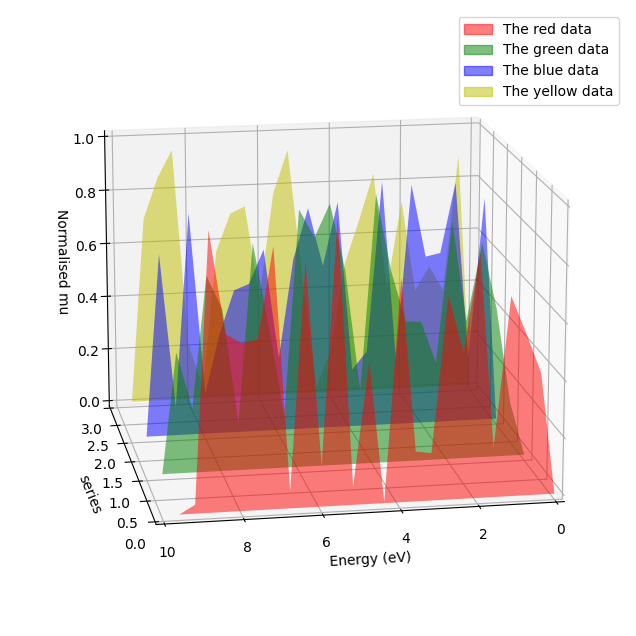

In [1]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection = '3d')
ax.view_init(elev=15, azim=80)

# create see through colours
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.1)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [*range(0,4,1)]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.5)
poly.set_label(['r','g','b','y'])
ax.add_collection3d(poly, zs=zs, zdir='y')

patches = [mpatches.Patch(color='r', label='The red data',alpha = 0.5),
           mpatches.Patch(color='g', label='The green data',alpha = 0.5),
           mpatches.Patch(color='b', label='The blue data',alpha = 0.5),
           mpatches.Patch(color='y', label='The yellow data',alpha = 0.5)]

ax.legend(handles=patches)
ax.set_xlabel('Energy (eV)')
ax.set_xlim3d(0, 10)
ax.set_ylabel('series')
ax.set_ylim3d(3,0)
ax.set_zlabel('Normalised mu')
ax.set_zlim3d(0, 1)

plt.show()

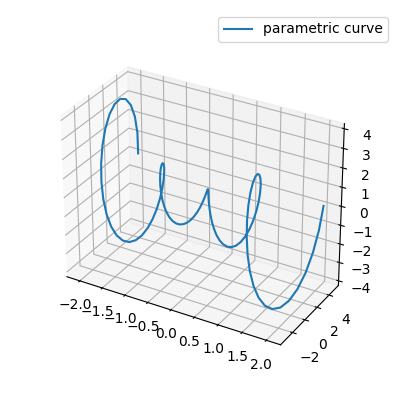

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(5,5))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)


"""                                                                                                                                                    
Scaling is done from here...                                                                                                                           
"""
x_scale=2
y_scale=1
z_scale=2

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

ax.get_proj=short_proj
"""                                                                                                                                                    
to here                                                                                                                                                
"""

ax.plot(z, y, x, label='parametric curve')
ax.legend()

plt.show()

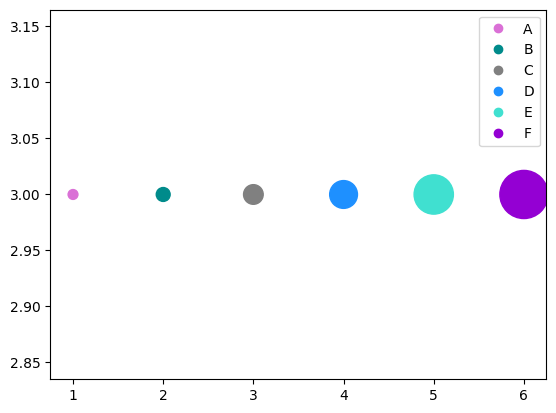

In [3]:
D_id_color = {'A': u'orchid', 'B': u'darkcyan', 'C': u'grey', 'D': u'dodgerblue', 'E': u'turquoise', 'F': u'darkviolet'}
x_coordinates = [1,2,3,4,5,6] # Added missing datapoint
y_coordinates = [3,3,3,3,3,3] # Added missing datapoint
size_map = [50,100,200,400,800,1200] # Added missing datapoint
color_map = [color for color in list(D_id_color.values())[:len(x_coordinates)]]
plt.scatter(x_coordinates,y_coordinates, s = size_map, c = color_map)

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
plt.legend(markers, D_id_color.keys(), numpoints=1)

plt.show()

In [4]:
markers

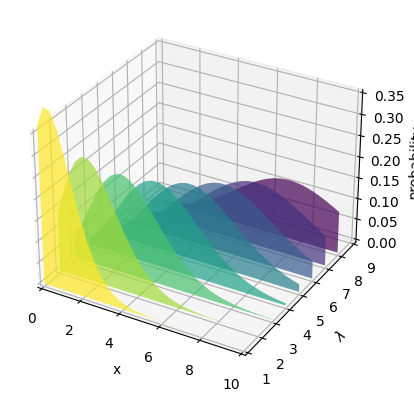

In [5]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import math
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
gamma = np.vectorize(math.gamma)
verts = [polygon_under_graph(x, l**x * np.exp(-l) / gamma(x + 1))
         for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()